In [2]:
# Load libraries and data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

import sklearn as sk

import warnings
warnings.filterwarnings('ignore')

# Load data
df = pd.read_csv('CKD_clean.csv')

# Part 1.
### Risk Factors for CKD

Let's look at the distributions of values for patients with and without CKD.

ValueError: num must be 1 <= num <= 16, not 17

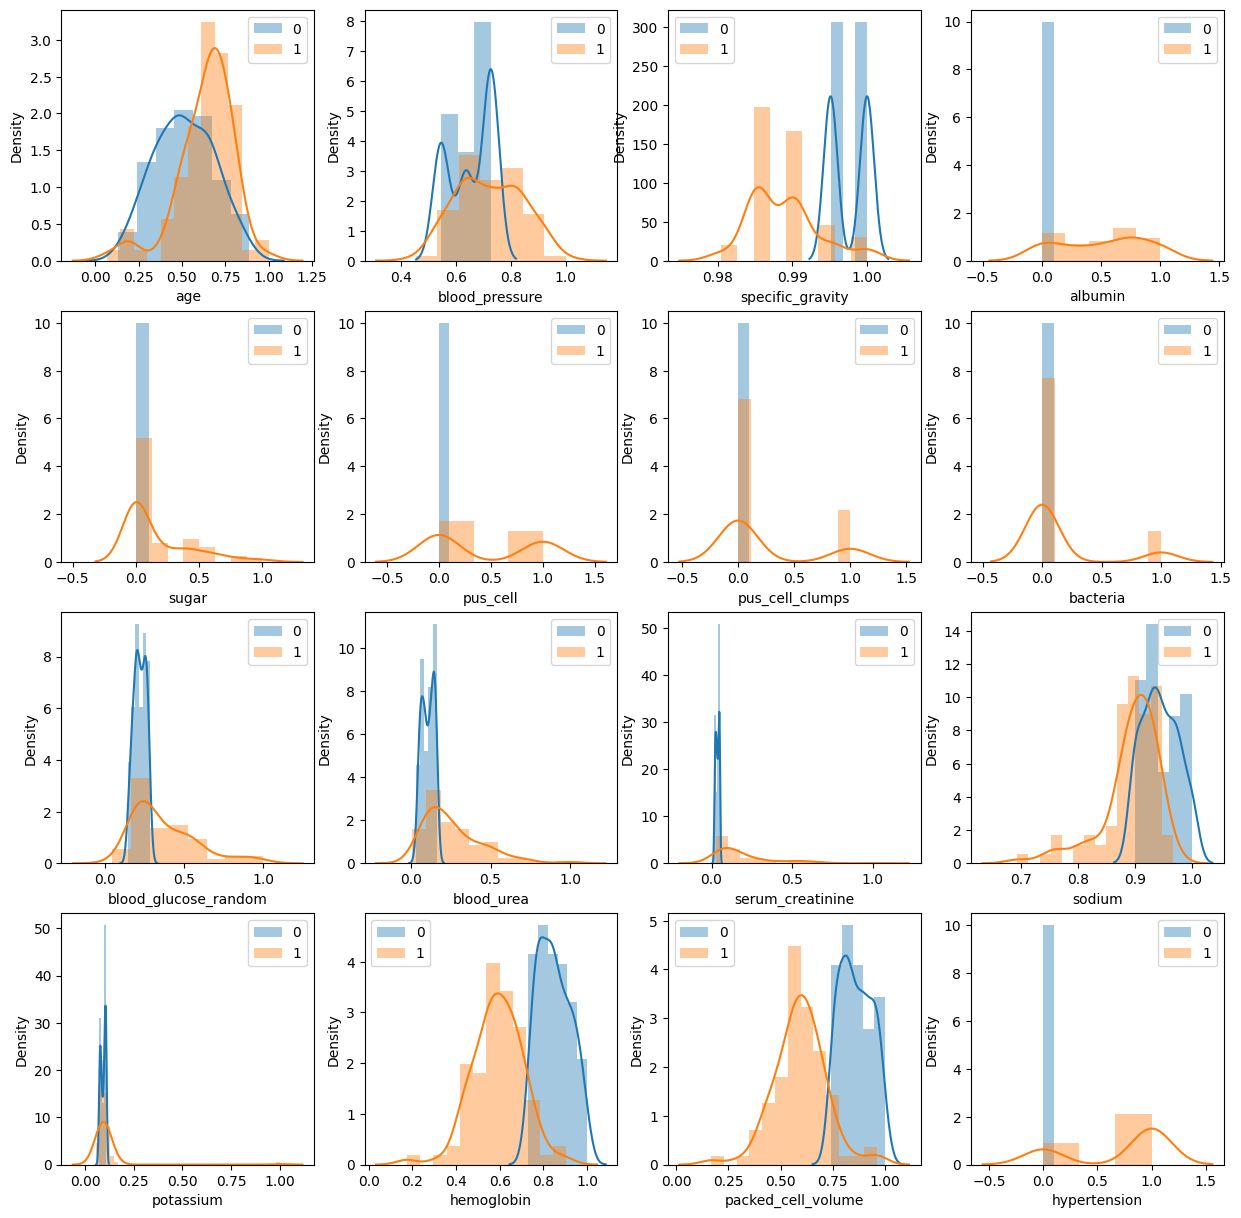

In [7]:
# graph distributions of every variable for class 0 and 1

plt.figure(figsize=(15,15))
for i, col in enumerate(df.columns):
    plt.subplot(4, 4, i+1)
    sns.distplot(df.loc[df['class'] == 0, col], label='0')
    sns.distplot(df.loc[df['class'] == 1, col], label='1')
    plt.legend()
plt.show()

Most of these features seam to be bimodal in both classes...

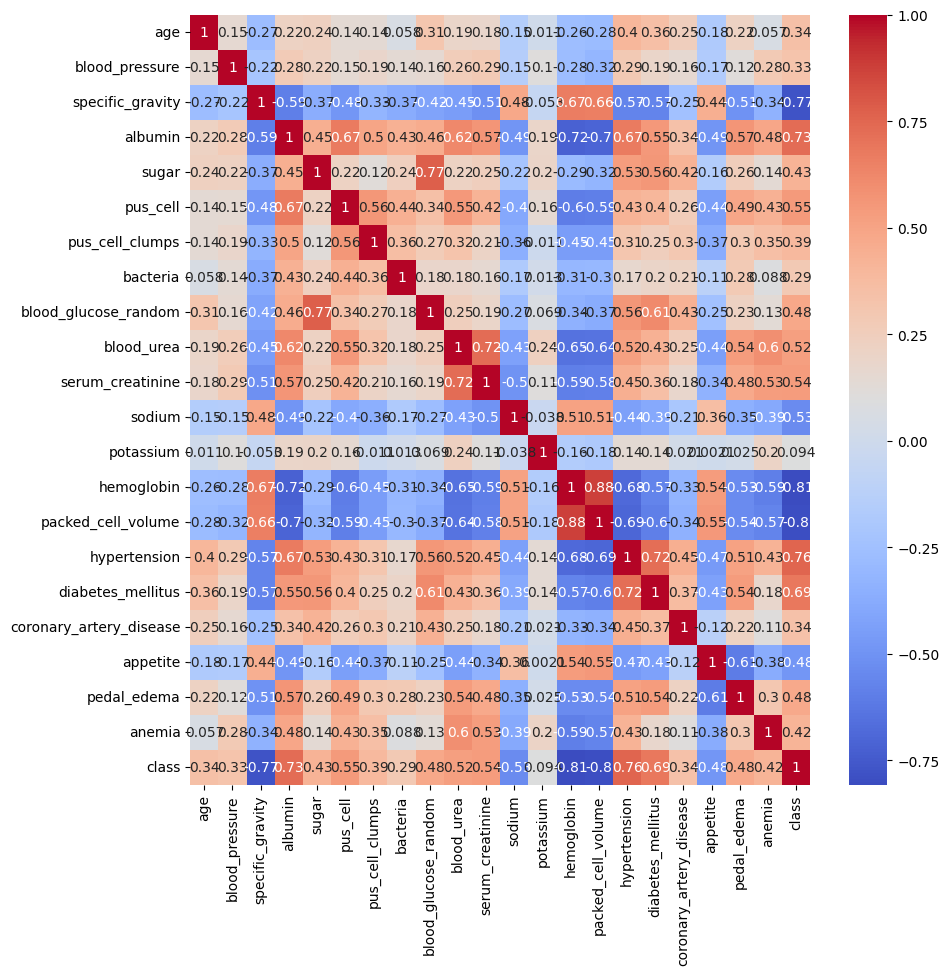

In [8]:
# correlation matrix
corr = df.corr()
plt.figure(figsize=(10,10))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.show()

The most onviously correlated features to the target class are hypertension, albumin, diabetes_mellitus, pus_cell, serum_creatine, and blood_urea.

So, we may say that people with hypertension, who are diabetic or in danger of being diabetic and who are losing protein are at great risk.

# Part 2.
#### Potential CKD Subtypes

As noted earlier, both classes for the dependent variable seem to be bimodal in many cases.  This suggests that there should be two subtypes.

We should take a look at the features and see if any binary features stick out.

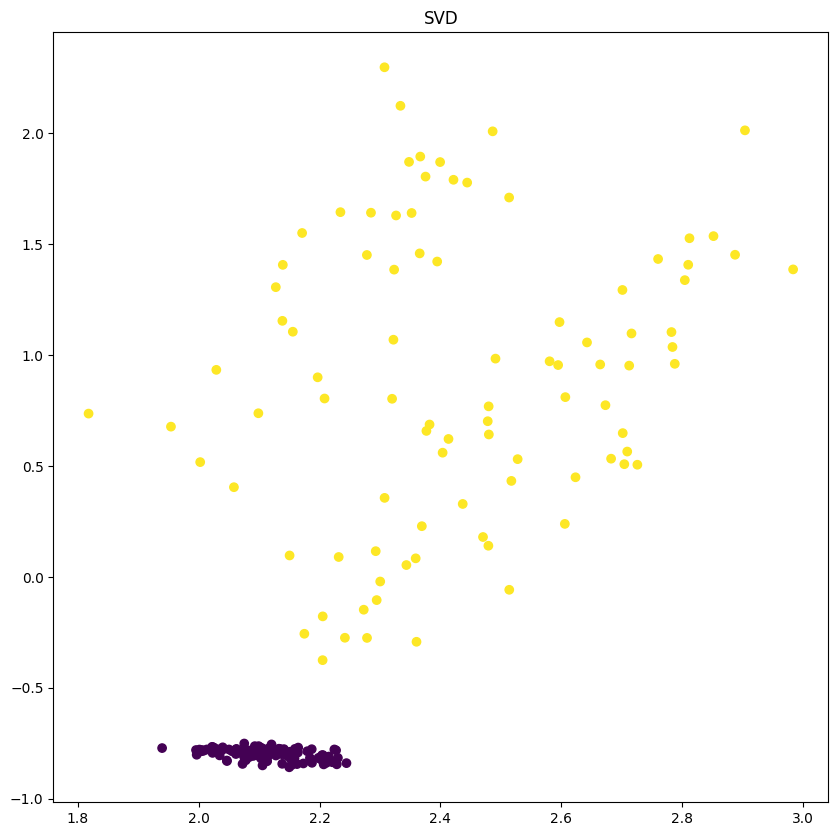

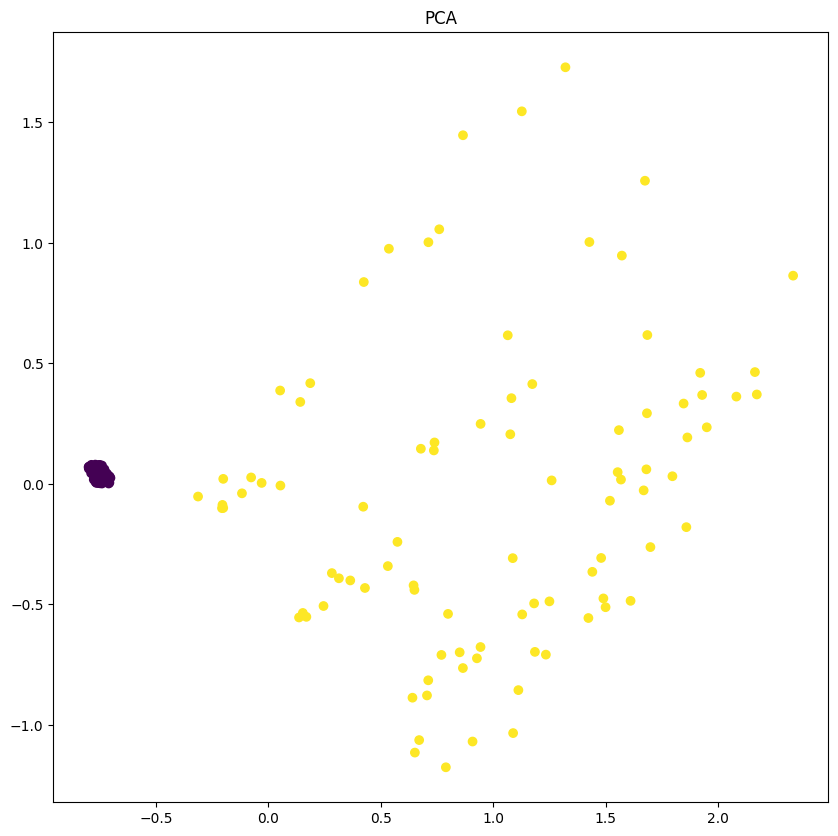

In [4]:
# singular value decomposition
from sklearn.decomposition import TruncatedSVD
svd = TruncatedSVD(n_components=2)
svd.fit(df)
svd.explained_variance_ratio_

# PCA
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(df)
pca.explained_variance_ratio_
# graph SVD and PCA
plt.figure(figsize=(10,10))
plt.scatter(svd.fit_transform(df)[:,0], svd.fit_transform(df)[:,1], c=df['class'])
plt.title('SVD')
plt.show()

plt.figure(figsize=(10,10))
plt.scatter(pca.fit_transform(df)[:,0], pca.fit_transform(df)[:,1], c=df['class'])
plt.title('PCA')
plt.show()


It's not immediately obvious, but maybe there are two clusters in the principal components.

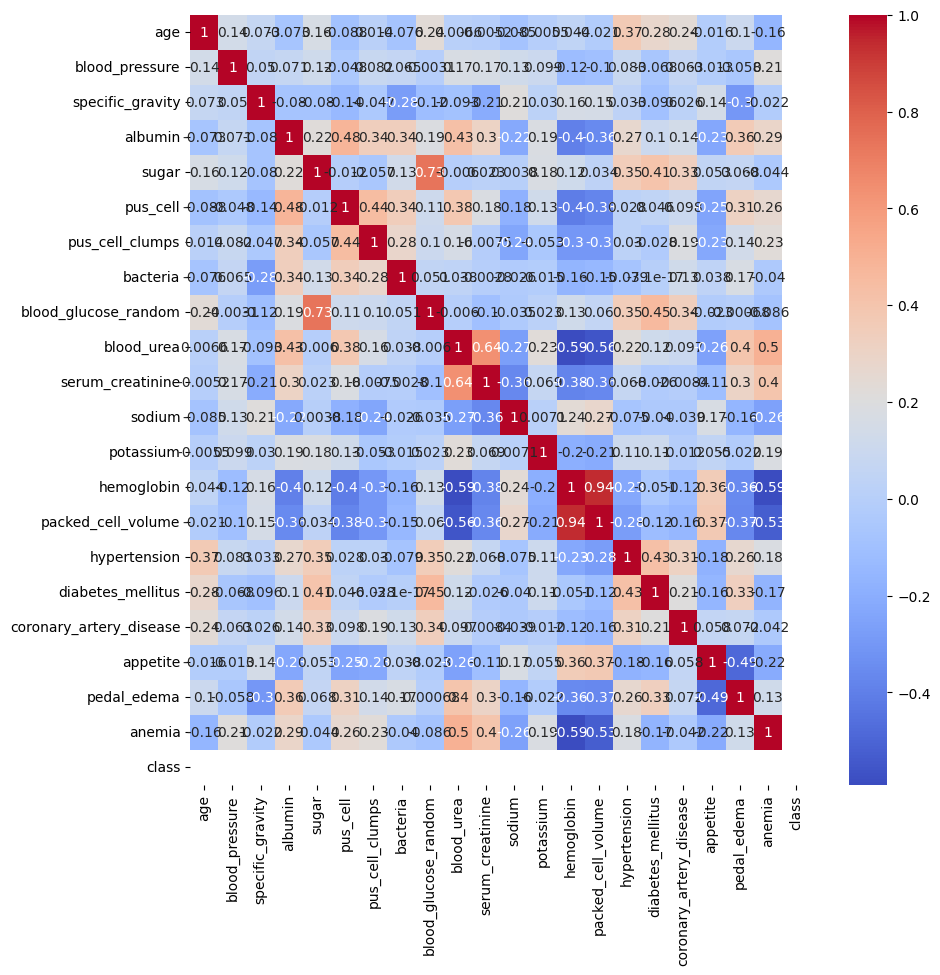

In [7]:
# dataframe of just the postive class
df_pos = df.loc[df['class'] == 1]

# dataframe of just the negative class
df_neg = df.loc[df['class'] == 0]

# correlation matrix for positive class
corr_pos = df_pos.corr()
plt.figure(figsize=(10,10))
sns.heatmap(corr_pos, annot=True, cmap='coolwarm')
plt.show()

There are strong correlations related to blood_glucose_random to sugar, which may indicate a diabetic subtype, and another high correlation surrounding packed_cell_volume to hemoglobin.  In this case, we consider closeness to these high correlations in terms of effect on one of the component axes.

### Clustering

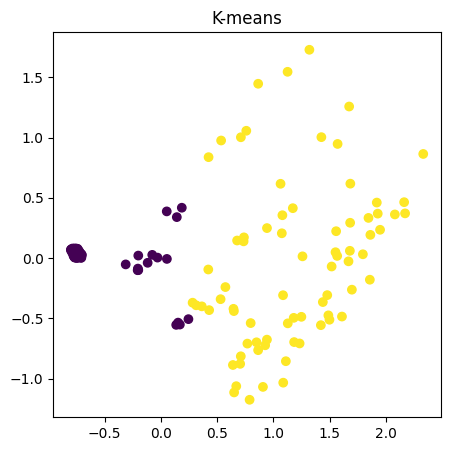

In [13]:
# K-means clustering
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=2)
kmeans.fit(df)
kmeans.cluster_centers_
kmeans.labels_

# graph K-means
plt.figure(figsize=(5,5))
plt.scatter(pca.fit_transform(df)[:,0], pca.fit_transform(df)[:,1], c=kmeans.labels_)
plt.title('K-means')
plt.show()

This K-Means cluster graph shows us that there are as many as 4 subtypes in the positive class, but perhaps just two (for our level of granularity).

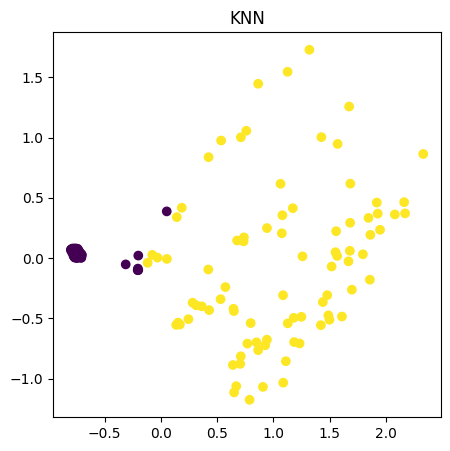

In [14]:
# KNN
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(df.drop('class', axis=1), df['class'])
knn.score(df.drop('class', axis=1), df['class'])

# graph KNN
plt.figure(figsize=(5,5))
plt.scatter(pca.fit_transform(df)[:,0], pca.fit_transform(df)[:,1], c=knn.predict(df.drop('class', axis=1)))
plt.title('KNN')
plt.show()


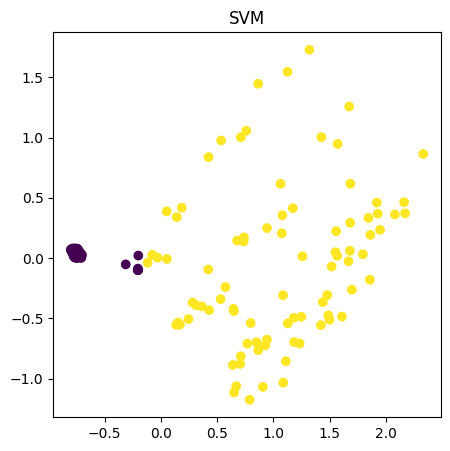

In [15]:
# SVM
from sklearn.svm import SVC
svm = SVC()
svm.fit(df.drop('class', axis=1), df['class'])
svm.score(df.drop('class', axis=1), df['class'])

# graph SVM
plt.figure(figsize=(5,5))
plt.scatter(pca.fit_transform(df)[:,0], pca.fit_transform(df)[:,1], c=svm.predict(df.drop('class', axis=1)))
plt.title('SVM')
plt.show()


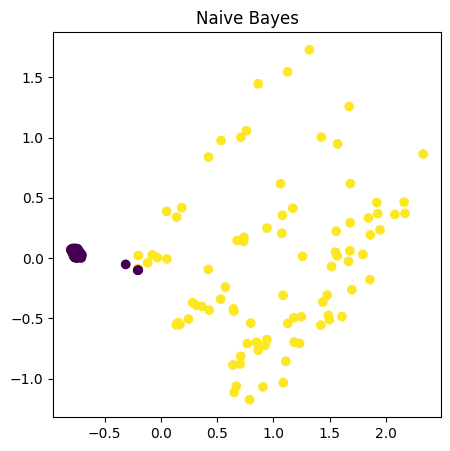

In [16]:
# Naive Bayes
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(df.drop('class', axis=1), df['class'])
nb.score(df.drop('class', axis=1), df['class'])

# graph Naive Bayes
plt.figure(figsize=(5,5))
plt.scatter(pca.fit_transform(df)[:,0], pca.fit_transform(df)[:,1], c=nb.predict(df.drop('class', axis=1)))
plt.title('Naive Bayes')
plt.show()

For me, the Naive Bayes Classifier is most convincing, and all the other models give some nuance... There appear clearly to be 2 subtypes of positive cases, and the correlation graphs will likely give a strong indication to other researchers.

If I had to guess about two subtypes, I would imagine they were people with or without serious issues with blood sugar regulation.